# Notebook content
--> imported packages like `pandas`, `numpy`, `matplotlib`, `seaborn`, `collections`, `math`, `sklearn`, `scipy`.
--> Created a function to load a csv file.
--> `df.describe()` function for checking the statistics of dataset.
--> [Commented] `df.iloc` function to extracting columns or rows from dataset.
--> Renaming the columns.
--> Use `.astype` function for casting the datatype.
--> Using `groupby` function and perform aggregation.
--> [Data Exploration] Plotting data by `boxplot` for checking outliers, `histogram` for checking counts of species, `kdeplot` for checking density, `scatterplot` and `heatmap` for checking correlation.
--> Finally work on `Linear Regression modeling`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter # method for counting values
import math
import scipy.stats as stats
%matplotlib inline

Writing a function for reading a csv file from filepath

In [3]:
def load_csv(filepath):
    data = []
    col = []
    checkcol = False
    with open(filepath) as f:
        for val in f.readlines():
            val = val.replace("\n","")
            val = val.split(',')
            if checkcol is False:
                col = val
                checkcol = True
            else:
                data.append(val)
    df = pd.DataFrame(data=data, columns=col)
    return df

In [4]:
dataset = load_csv("dataset.csv")

In [5]:
dataset.head()

,ï»¿Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242,23.2,25.4,30,11.52,4.02
1,Bream,290,24,26.3,31.2,12.48,4.3056
2,Bream,340,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363,26.3,29,33.5,12.73,4.4555
4,Bream,430,26.5,29,34,12.444,5.134


In [6]:
dataset.describe(include='all')

,ï»¿Species,Weight,Length1,Length2,Length3,Height,Width
count,159,159,159,159,159,159,159
unique,7,101,116,93,124,154,152
top,Perch,300,19,22,23.5,11.1366,3.525
freq,56,6,6,7,5,2,3


In [7]:
# This way of slicing dataset doesn't give Column headers
'''
x_train = np.array(dataset[['Length1', 'Length2', 'Length3', 'Height', 'Width']])
y_train = np.array(dataset['Weight'])
'''

"\nx_train = np.array(dataset[['Length1', 'Length2', 'Length3', 'Height', 'Width']])\ny_train = np.array(dataset['Weight'])\n"

In [8]:
# let's use iloc
'''
x_train = dataset.iloc[:, 2:]
y_train = dataset.iloc[:, 1]
'''

'\nx_train = dataset.iloc[:, 2:]\ny_train = dataset.iloc[:, 1]\n'

Renaming dataframe columns

In [12]:
dataset.columns = ["species", "mass", "vertical_(cm)", "diagonal_(cm)", "cross_(cm)", "height_(cm)", "width_(cm)"]

In [13]:
dataset.columns

Index(['species', 'mass', 'vertical_(cm)', 'diagonal_(cm)', 'cross_(cm)',
       'height_(cm)', 'width_(cm)'],
      dtype='object')

In [14]:
dataset[dataset['mass']==0]

,species,mass,vertical_(cm),diagonal_(cm),cross_(cm),height_(cm),width_(cm)


In [15]:
dataset['species'] = dataset['species'].astype('category')

In [16]:
dataset.describe(include='category')

,species
count,159
unique,7
top,Perch
freq,56


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   species        159 non-null    category
 1   mass           159 non-null    object  
 2   vertical_(cm)  159 non-null    object  
 3   diagonal_(cm)  159 non-null    object  
 4   cross_(cm)     159 non-null    object  
 5   height_(cm)    159 non-null    object  
 6   width_(cm)     159 non-null    object  
dtypes: category(1), object(6)
memory usage: 8.1+ KB


In [18]:
dataset[['mass', 'vertical_(cm)', 'diagonal_(cm)', 'cross_(cm)', 'height_(cm)', 'width_(cm)']] = dataset[['mass', 'vertical_(cm)', 'diagonal_(cm)','cross_(cm)', 'height_(cm)', 'width_(cm)']].astype('float64')

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   species        159 non-null    category
 1   mass           159 non-null    float64 
 2   vertical_(cm)  159 non-null    float64 
 3   diagonal_(cm)  159 non-null    float64 
 4   cross_(cm)     159 non-null    float64 
 5   height_(cm)    159 non-null    float64 
 6   width_(cm)     159 non-null    float64 
dtypes: category(1), float64(6)
memory usage: 8.1 KB


In [20]:
grp = dataset.groupby('species').describe().T
grp.loc['mass', :]

species,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
count,35.000000,11.000000,56.000000,17.000000,20.000000,14.000000,6.000000
mean,617.828571,154.818182,382.239286,718.705882,152.050000,11.178571,531.000000
std,209.205709,78.755086,347.617717,494.140765,88.828916,4.131526,309.602972
min,242.000000,55.000000,5.900000,200.000000,0.000000,6.700000,270.000000
25%,462.500000,105.000000,120.000000,345.000000,104.250000,8.950000,279.000000
50%,610.000000,145.000000,207.500000,510.000000,147.500000,9.850000,423.000000
75%,717.000000,185.000000,692.500000,950.000000,171.750000,12.200000,735.000000
max,1000.000000,300.000000,1100.000000,1650.000000,390.000000,19.900000,1000.000000


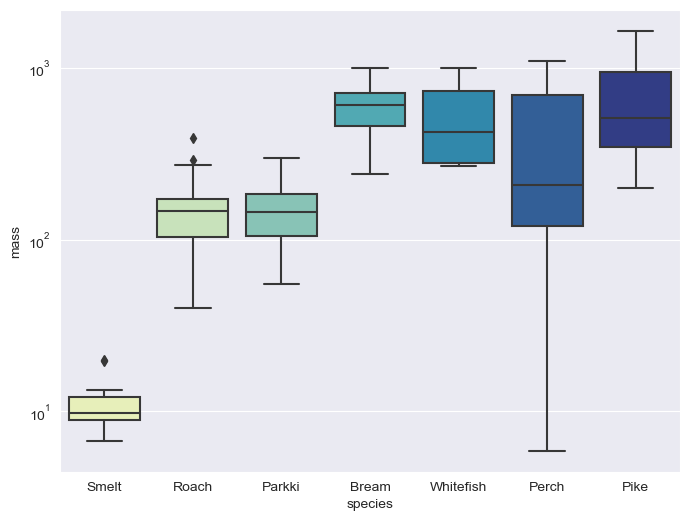

In [21]:
plt.figure(figsize=(8,6))

sns.boxplot(x = 'species', y = 'mass', data = dataset,
            palette= 'YlGnBu',
            order=['Smelt', 'Roach', 'Parkki', 'Bream',
                   'Whitefish', 'Perch', 'Pike'])
plt.yscale('log')
plt.show()

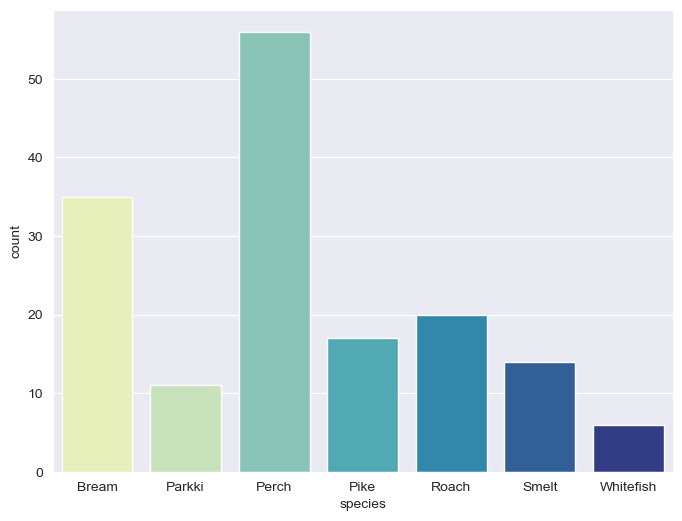

In [22]:
plt.figure(figsize=(8,6))

sns.countplot(x='species', data=dataset, palette='YlGnBu')
'''
# Trying to add data lable
for i, bar in enumerate(plt.ax.patches):
    height = bar.get_height()
    plt.text(
        i,
        height+10,
        '{}'.format(int(height)),
        ha='center',
        va='center',
        fontweight='bold',
        size=14
    )
'''
plt.show()

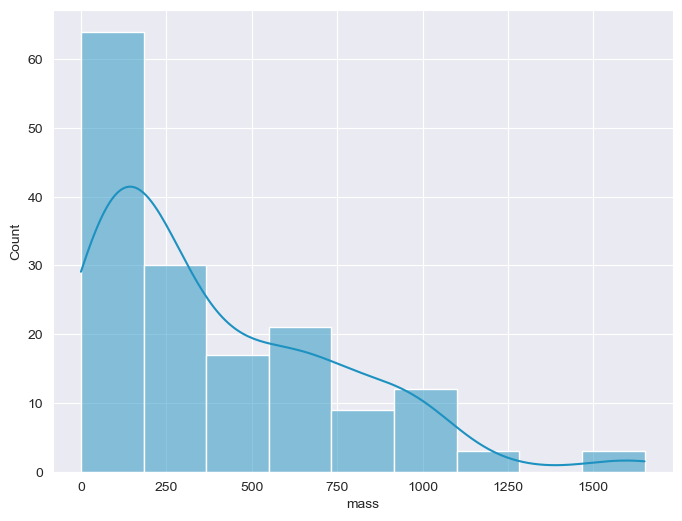

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(x='mass', data=dataset, color='#1d91c0', kde=True)
plt.show()

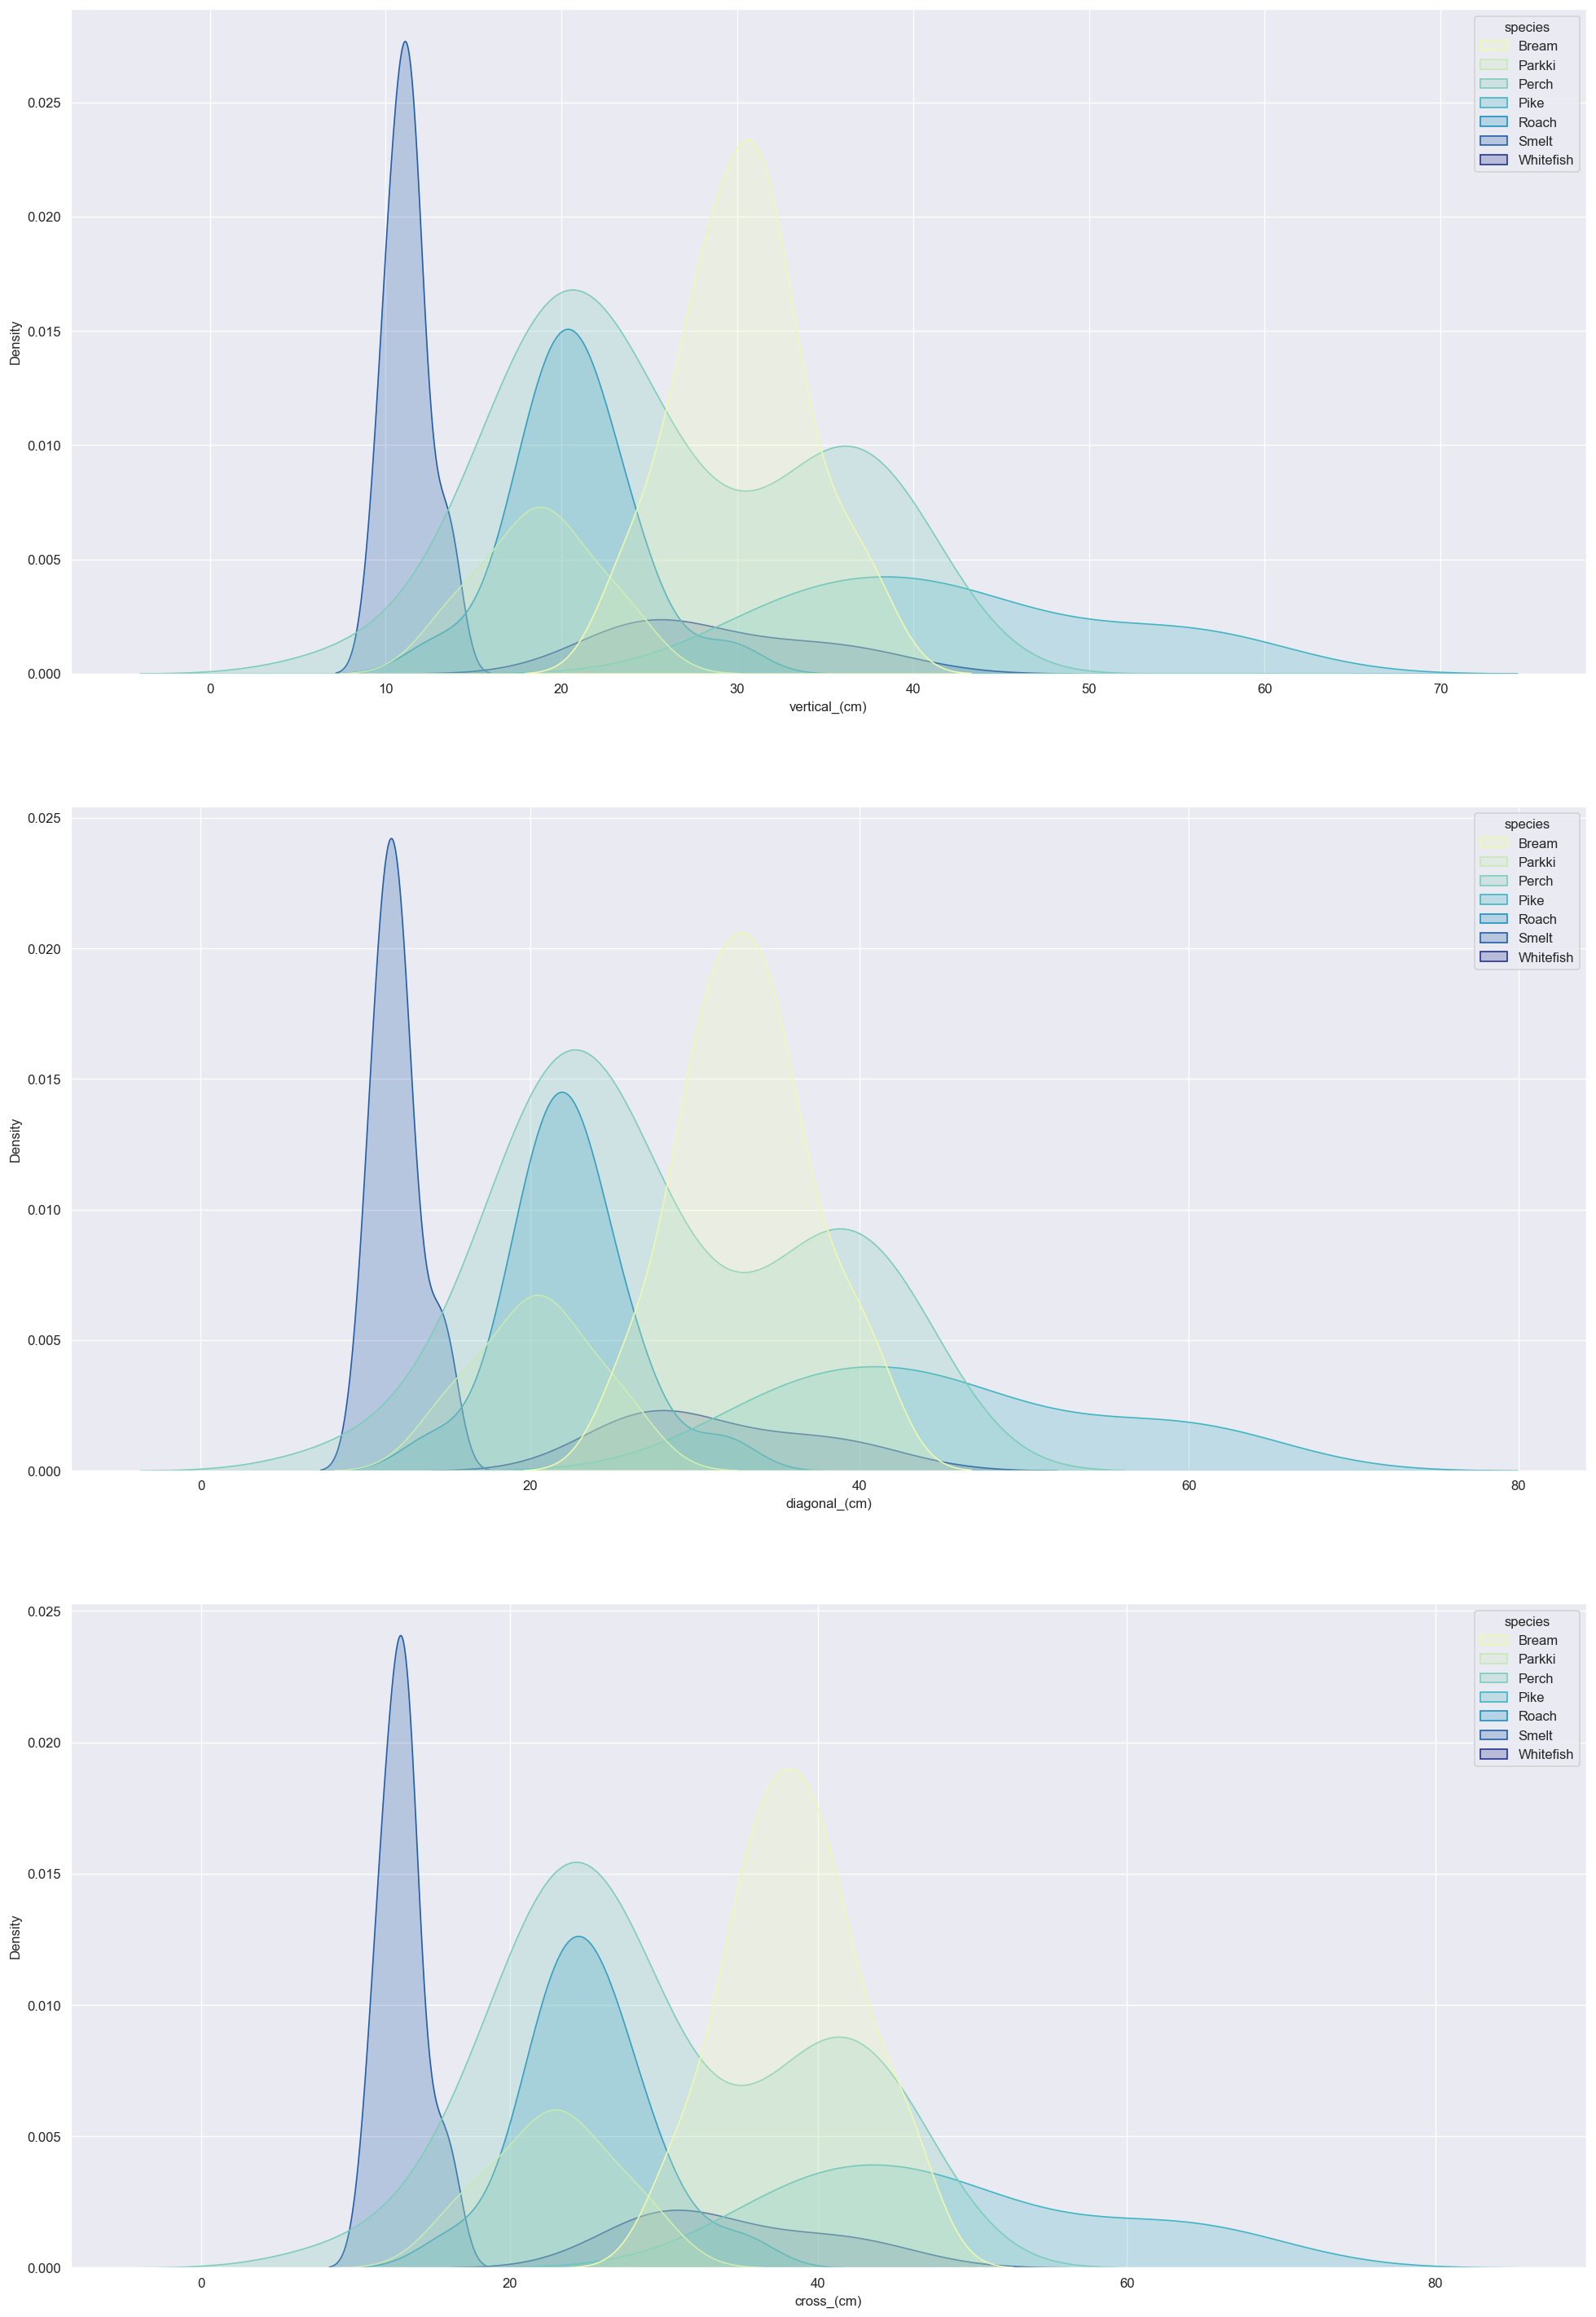

In [24]:
fig, ax = plt.subplots(3,1, figsize=(20,30), dpi=120)

sns.kdeplot(x = 'vertical_(cm)', data=dataset, ax=ax[0], hue='species', fill=True, palette='YlGnBu')
sns.kdeplot(x = 'diagonal_(cm)', data=dataset, ax=ax[1],hue='species', fill=True, palette='YlGnBu')
sns.kdeplot(x='cross_(cm)', data=dataset, ax=ax[2], hue='species', fill=True, palette='YlGnBu')
plt.show()

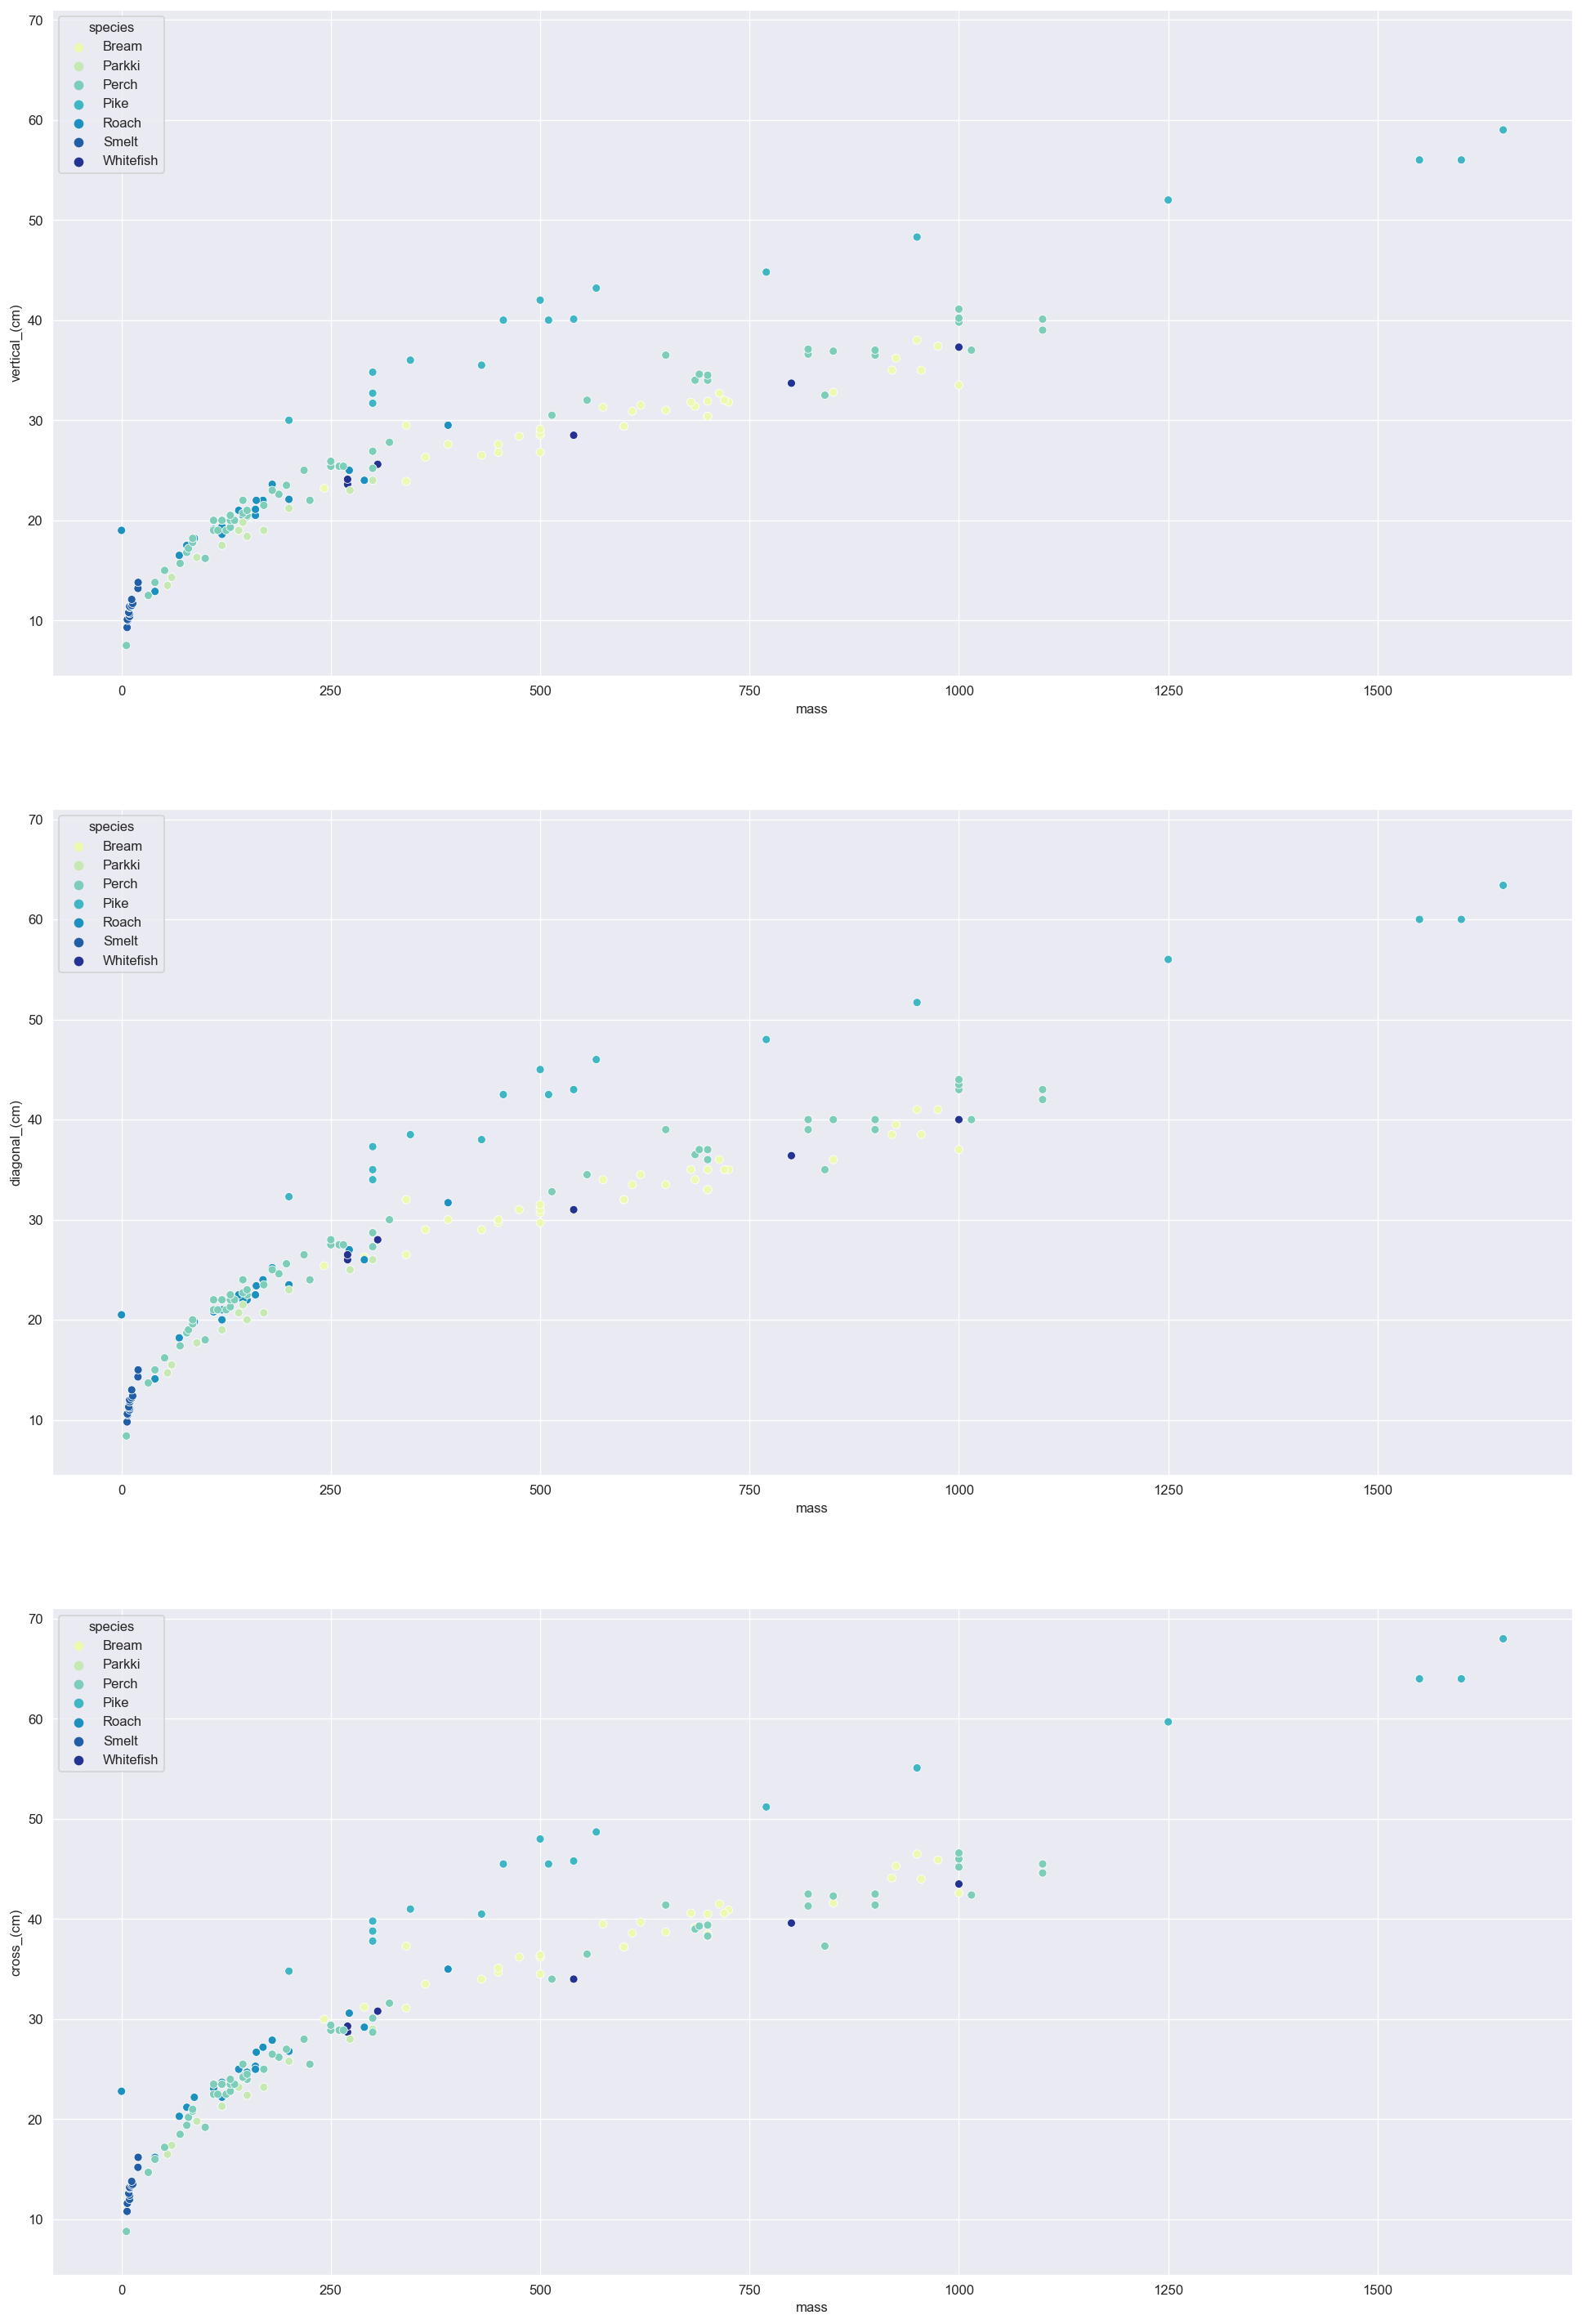

In [26]:
fig, ax = plt.subplots(3,1, figsize=(20, 30), sharey=True, dpi=120)

sns.scatterplot(x='mass', y='vertical_(cm)', data=dataset, ax=ax[0], hue='species', palette='YlGnBu')
sns.scatterplot(x='mass', y = 'diagonal_(cm)', data = dataset,ax=ax[1], hue='species', palette = 'YlGnBu')
sns.scatterplot(x='mass', y='cross_(cm)', data=dataset, ax=ax[2], hue='species', palette='YlGnBu')

plt.show()

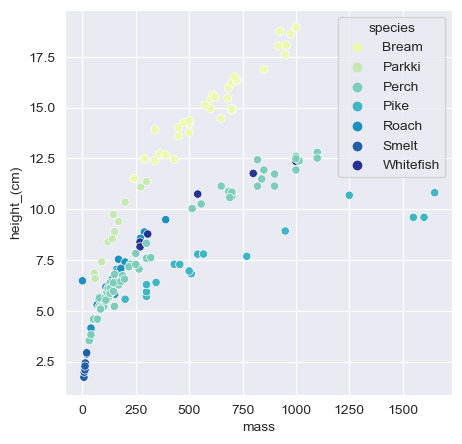

In [27]:
plt.figure(figsize=(5,5), dpi=100)

sns.scatterplot(x='mass', y='height_(cm)', data=dataset, hue='species', palette = 'YlGnBu')

plt.show()

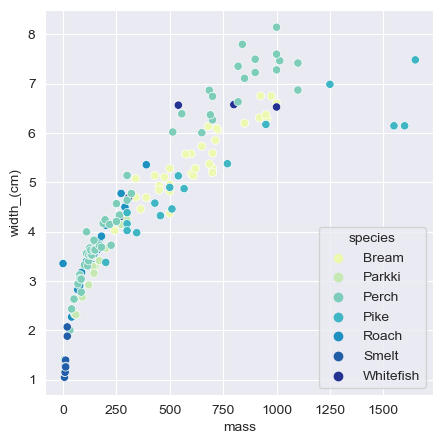

In [28]:
plt.figure(figsize=(5,5), dpi=100)

sns.scatterplot(x='mass', y='width_(cm)', data=dataset, hue='species', palette='YlGnBu')

plt.show()

In [30]:
dataset['species']= dataset['species'].cat.codes

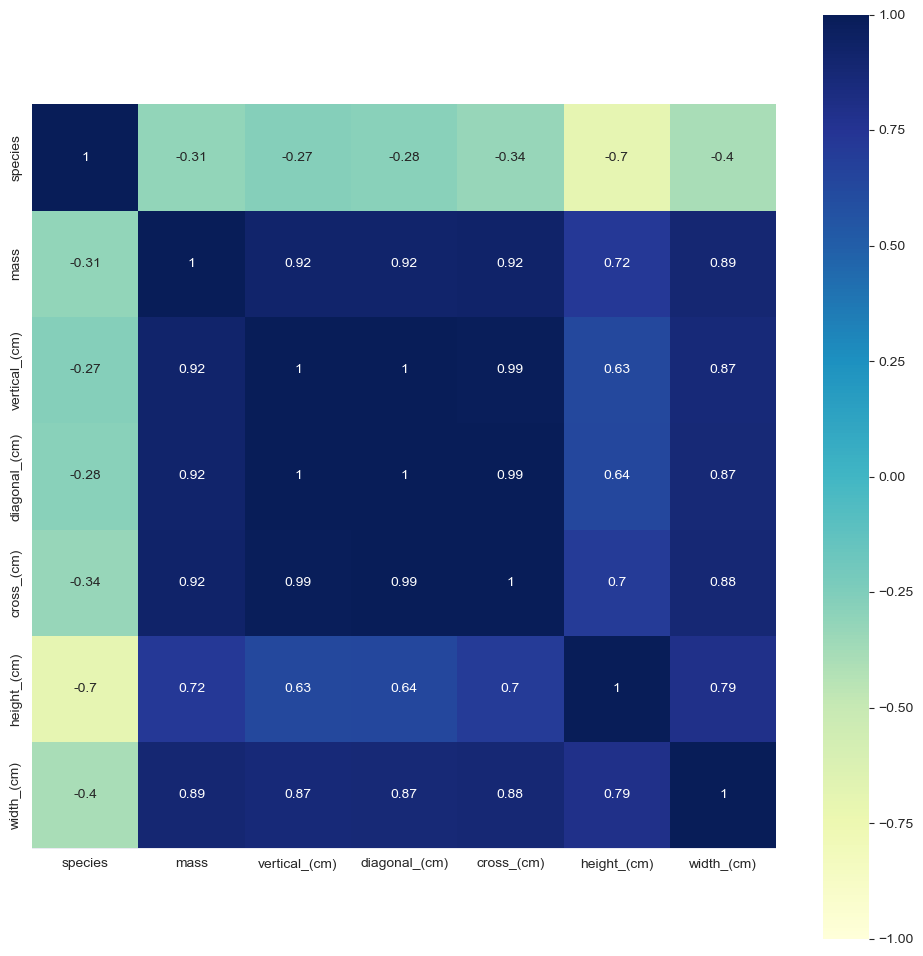

In [32]:
fig, ax = plt.subplots(figsize= (12,12))

sns.heatmap(dataset.corr(), square = True, cmap = 'YlGnBu', ax = ax, vmin = -1, annot = True)

plt.show()

## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
x = dataset.drop(['mass', 'diagonal_(cm)'], axis=1)

In [35]:
y = dataset['mass']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
print('x_train: ', np.shape(x_train))
print('x_test: ', np.shape(x_test))
print('y_train: ', np.shape(y_train))
print('y_test: ', np.shape(y_test))

x_train:  (127, 5)
x_test:  (32, 5)
y_train:  (127,)
y_test:  (32,)


In [38]:
lin_reg = LinearRegression()

In [39]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [40]:
lin_reg.coef_

array([ 23.22261827,  59.96706083, -32.6314216 ,  37.13355158,
        11.59083998])

In [41]:
y_pred = lin_reg.predict(x_test)

In [42]:
lin_reg.score(x_test, y_test)

0.9040930780080159

Accuracy Score is 90.41